In [5]:
!pip install streamlit

Tamanho do conjunto de treino: 1688 amostras
Tamanho do conjunto de teste: 423 amostras

Iniciando o treinamento do modelo...
Treinamento concluído!
Modelo salvo como 'random_forest_obesity_model_v2.pkl'

--- Avaliação do Modelo no Conjunto de Teste ---

Acurácia do modelo no conjunto de teste: 0.9409 🎯

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.76      0.93      0.84        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.86      0.90        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.94       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.94      0.94    

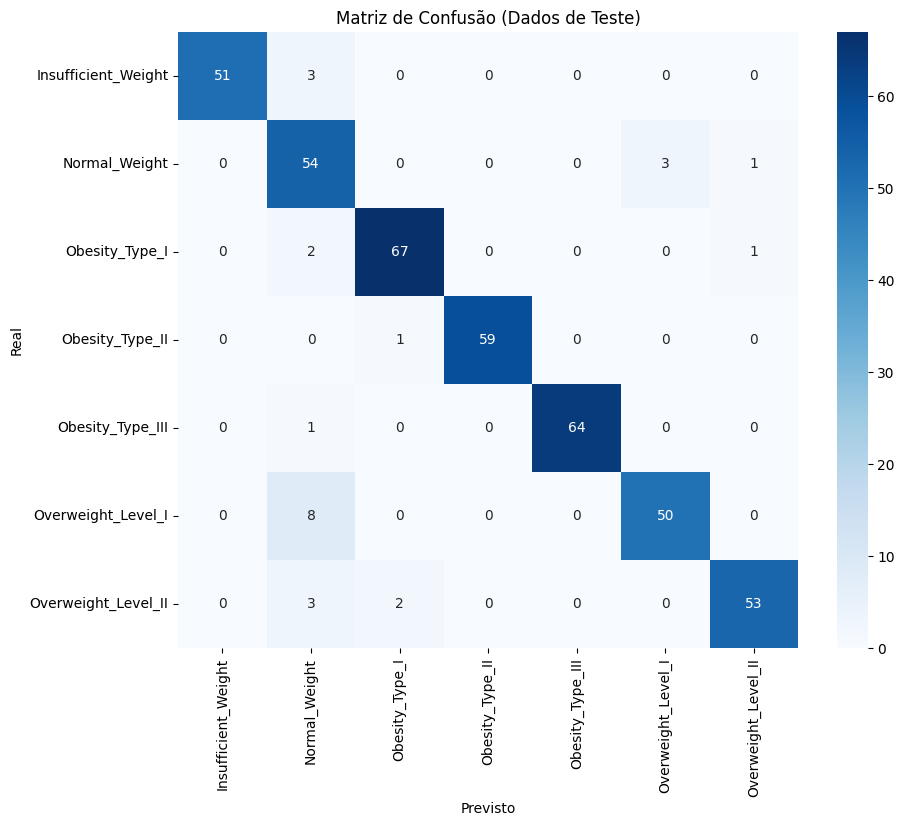

In [21]:
# 1. Importando bbibliotecas para treinamento e visualização dos resultados

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Utilizando o "try except" para validar a existência do arquivo base para treinamento
try:
    df = pd.read_csv("Obesity.csv")
except FileNotFoundError:
    print("Erro: Arquivo 'Obesity.csv' não encontrado.")
    exit()

# 3. Separando as features (X) e o alvo (y)
X = df.drop(columns=["Obesity"])
y = df["Obesity"]

# 80% para treino, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=215467, stratify=y)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")

# 4. Definir o pipeline de pré-processamento e o modelo
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 5. Transformador de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 6. Criar o pipeline final com o modelo
modelo_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=215467))
])

# 7. Treinar o modelo APENAS com os dados de treino
print("\nTreinamento o modelo")
modelo_pipeline.fit(X_train, y_train)
print("Treinamento realizado")

# 8. Salvar o modelo treinado no diretório do colab
joblib.dump(modelo_pipeline, "rf_obesity_model.pkl")
print("Modelo salvo: 'rf_obesity_model.pkl'")

# 9. Avaliar o modelo no conjunto de TESTE (dados não vistos)
print("\n--- Avaliação ---")
y_pred = modelo_pipeline.predict(X_test)

# 10. Calcular e exibir as métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.4f} 🎯")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred, labels=modelo_pipeline.classes_)
print(cm)

# 11. Visualizar a matriz de confusão
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='bone', xticklabels=modelo_pipeline.classes_, yticklabels=modelo_pipeline.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Dados de teste')
plt.show()